In [1]:
import pandas as pd

In [2]:
csv_path='..\\..\\sqlResult_1558435.csv'

In [3]:
content=pd.read_csv(csv_path,encoding='gb18030')

In [4]:
content=content.fillna('')

In [5]:
content=content['content'].tolist()

In [6]:
import jieba

In [7]:
def cut(string): return ' '.join(jieba.cut(string))

In [8]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.859 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [9]:
import re

In [10]:
def token(string):
    return re.findall(r'[\d|\w]+',string)

In [11]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [12]:
news_content=[token(n) for n in content]

In [13]:
news_content=[' '.join(n) for n in news_content]

In [14]:
news_content=[cut(n) for n in news_content]

In [15]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [41]:
with open('news_sentences_cut.txt','w',encoding='utf-8') as f:
    for n in news_content:
        f.write(n+'\n')

In [37]:
from gensim.models import Word2Vec

In [38]:
from gensim.models.word2vec import LineSentence

In [42]:
news_word2vec=Word2Vec(LineSentence('news_sentences_cut.txt'),size=35,workers=6)

In [43]:
news_word2vec.wv.most_similar('葡萄牙')

[('意大利', 0.8981146216392517),
 ('乌拉圭', 0.8493003845214844),
 ('捷克', 0.840553879737854),
 ('比利时', 0.8255393505096436),
 ('西班牙', 0.8062971234321594),
 ('克罗地亚', 0.8033019304275513),
 ('摩洛哥', 0.7893234491348267),
 ('巴塞罗那', 0.7876074314117432),
 ('苏格兰', 0.7860672473907471),
 ('保加利亚', 0.7850931286811829)]

In [46]:
from collections import defaultdict

In [59]:
def get_related_words(initial_words,model):
    unseen=initial_words
    seen=defaultdict(int)
    
    max_size=500
    
    while unseen and len(seen)<max_size:
        if len(seen)%50==0:
            print('seen length:{}'.format(len(seen)))
            
        node=unseen.pop(0)
        #print(node)
        new_expanding=[w for w,s in model.wv.most_similar(node,topn=20)]
        unseen+=new_expanding
        #print(unseen)
        seen[node]+=1
        #print(len(seen))
    return seen

In [62]:
related_words=get_related_words(['说'],news_word2vec)

seen length:0
seen length:50
seen length:100
seen length:100
seen length:150
seen length:150
seen length:150
seen length:150
seen length:150
seen length:150
seen length:150
seen length:150
seen length:150
seen length:200
seen length:250
seen length:300
seen length:350
seen length:400
seen length:450
seen length:450
seen length:450


In [63]:
related_words

defaultdict(int,
            {'说': 81,
             '表示': 64,
             '认为': 61,
             '指出': 70,
             '坦言': 70,
             '告诉': 54,
             '明说': 42,
             '看来': 41,
             '透露': 57,
             '介绍': 37,
             '所说': 64,
             '称': 38,
             '强调': 33,
             '文说': 37,
             '特别强调': 48,
             '深有体会': 23,
             '问': 22,
             '时说': 28,
             '称赞': 29,
             '如是说': 24,
             '提到': 43,
             '普遍认为': 29,
             '建议': 19,
             '接受': 14,
             '呼吁': 20,
             '相信': 16,
             '而言': 11,
             '直言': 27,
             '首先': 14,
             '确信': 18,
             '答': 9,
             '提出': 9,
             '觉得': 6,
             '说道': 25,
             '地说': 6,
             '坦承': 8,
             '看到': 6,
             '留意到': 9,
             '见到': 6,
             '郭爽': 5,
             '手记': 6,
             '潘晔': 6,
             '得知': 6,
  

In [65]:
sorted(related_words.items(),key=lambda x:x[1],reverse=True)

[('说', 81),
 ('指出', 70),
 ('坦言', 70),
 ('表示', 64),
 ('所说', 64),
 ('认为', 61),
 ('透露', 57),
 ('告诉', 54),
 ('特别强调', 48),
 ('提到', 43),
 ('明说', 42),
 ('看来', 41),
 ('称', 38),
 ('介绍', 37),
 ('文说', 37),
 ('强调', 33),
 ('称赞', 29),
 ('普遍认为', 29),
 ('时说', 28),
 ('直言', 27),
 ('说道', 25),
 ('如是说', 24),
 ('深有体会', 23),
 ('问', 22),
 ('呼吁', 20),
 ('建议', 19),
 ('确信', 18),
 ('相信', 16),
 ('接受', 14),
 ('首先', 14),
 ('中说', 14),
 ('回答', 14),
 ('知道', 14),
 ('谈论', 13),
 ('而言', 11),
 ('中称', 11),
 ('知情', 11),
 ('声称', 11),
 ('的话', 11),
 ('黄进', 10),
 ('西万', 10),
 ('提及', 10),
 ('写道', 10),
 ('所指', 10),
 ('引用', 10),
 ('答', 9),
 ('提出', 9),
 ('留意到', 9),
 ('要说', 9),
 ('时称', 9),
 ('谈谈', 9),
 ('感谢', 9),
 ('不在意', 9),
 ('坦承', 8),
 ('眼中', 8),
 ('作答', 8),
 ('来说', 7),
 ('来讲', 7),
 ('证实', 7),
 ('问道', 7),
 ('说出', 7),
 ('在我看来', 7),
 ('觉得', 6),
 ('地说', 6),
 ('看到', 6),
 ('见到', 6),
 ('手记', 6),
 ('潘晔', 6),
 ('得知', 6),
 ('还是', 6),
 ('反驳', 6),
 ('解释', 6),
 ('正如', 6),
 ('重申', 6),
 ('敦促', 6),
 ('郭爽', 5),
 ('武说', 5),
 ('洪说', 5),
 ('农艺师', 5),

In [15]:
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [17]:
document_frequency('的')

70342

In [16]:
import math

In [18]:
def idf(word):
    return math.log10(len(news_content)/document_frequency(word))

In [19]:
idf('的')

0.1051466115514474

In [20]:
def tf(word,document):
    words=document.split()
    return sum(1 for w in words if w==word)

In [21]:
tf('短期',news_content[11])

3

In [24]:
def get_keywords_of_a_document(document):
    words=document.split()
    tfidf=[
        (w,tf(w,document)*idf(w)) for w in words
    ]
    tfidf=sorted(tfidf,key=lambda x:x[1],reverse=True)
    return tfidf

In [26]:
get_keywords_of_a_document(news_content[0])

[('MIUI', 13.953993984385477),
 ('MIUI', 13.953993984385477),
 ('MIUI', 13.953993984385477),
 ('机型', 5.854110917055407),
 ('机型', 5.854110917055407),
 ('体验版', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('系统优化', 4.9523613237924735),
 ('精力', 4.865066660033509),
 ('精力', 4.865066660033509),
 ('内测', 4.17421007340883),
 ('官方消息', 3.9523613237924735),
 ('距今已有', 3.6301420290585544),
 ('更新换代', 3.433847383914586),
 ('用到', 3.339577467072738),
 ('确切', 3.139447967149618),
 ('有余', 3.0128420711738553),
 ('小米', 2.948039950009831),
 ('猜测', 2.6828483795745575),
 ('本周', 2.3069390544433817),
 ('其余', 2.2953054709353697),
 ('工程师', 2.2595144045152438),
 ('更新', 2.2143739974590426),
 ('暂停', 2.188933330229536),
 ('发布', 2.15877938610806),
 ('发布', 2.15877938610806),
 ('之中', 2.129539678489369),
 ('当然', 2.040139267260058),
 ('等待', 2.0327603000083627),
 ('有人', 1.7504182603908234),
 ('研发', 1.7322532357524185),
 ('手机', 1.7180971994136842),
 ('确保', 1.6071837072497697),
 ('含', 1.5902

In [28]:
import wordcloud

In [31]:
wc=wordcloud.WordCloud('..\\..\\SourceHanSerifSC-Regular.otf')

In [114]:
import matplotlib.pyplot as plt

In [30]:
machine_keywords=get_keywords_of_a_document(news_content[101])

In [32]:
machine_keywords_dict={w:score for w,score in machine_keywords}

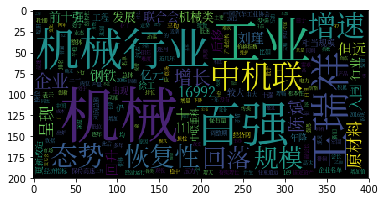

In [33]:
plt.imshow(wc.generate_from_frequencies(machine_keywords_dict))

In [34]:
shenzhen_keywords=get_keywords_of_a_document(news_content[4])

In [35]:
from PIL import Image

In [16]:
import numpy as np

In [39]:
mask=np.array(Image.open('..\\..\\b2cb5260c7afd3e8efb760e5843f1cc0.png'))

In [40]:
wordcloud_with_mask=wordcloud.WordCloud(font_path='..\\..\\SourceHanSerifSC-Regular.otf',mask=mask)

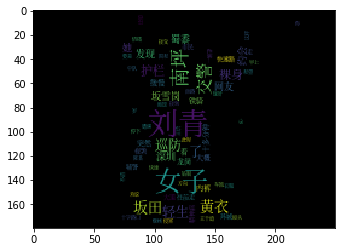

In [43]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:score for w,score in shenzhen_keywords}))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorized=TfidfVectorizer()

In [19]:
sample_num=1000

In [20]:
sub_samples=news_content[:sample_num]

In [21]:
X=vectorized.fit_transform(sub_samples)

In [22]:
X.shape

(1000, 43851)

In [23]:
import random

In [24]:
document_id_1,document_id_2=random.randint(0,1000),random.randint(0,1000)

In [25]:
document_id_2

151

In [26]:
vector1=X[document_id_1].toarray()[0]

In [27]:
vector2=X[document_id_2].toarray()[0]

In [28]:
from scipy.spatial.distance import cosine

In [29]:
def distance(v1,v2):return cosine(v1,v2)

In [30]:
distance(vector1,vector2)

0.9975079522759333

In [31]:
rand_id=random.randint(0,1000)

In [32]:
vector3=X[rand_id].toarray()[0]

In [33]:
distance(vector1,vector3)

0.9927127024996508

In [34]:
sorted(list(range(1000)),key=lambda x:distance(vector3,X[x].toarray()[0]))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[116,
 430,
 105,
 77,
 42,
 83,
 658,
 28,
 35,
 37,
 48,
 81,
 49,
 109,
 73,
 33,
 7,
 52,
 108,
 11,
 124,
 91,
 21,
 22,
 27,
 38,
 54,
 20,
 14,
 64,
 36,
 98,
 86,
 29,
 8,
 93,
 41,
 31,
 47,
 46,
 69,
 66,
 96,
 6,
 84,
 5,
 4,
 65,
 115,
 24,
 123,
 75,
 60,
 110,
 94,
 63,
 61,
 13,
 26,
 19,
 106,
 0,
 56,
 97,
 9,
 1,
 68,
 76,
 71,
 88,
 43,
 85,
 67,
 101,
 34,
 95,
 102,
 120,
 51,
 80,
 40,
 90,
 12,
 121,
 125,
 30,
 59,
 104,
 62,
 99,
 79,
 113,
 50,
 70,
 78,
 92,
 23,
 122,
 118,
 87,
 58,
 17,
 117,
 16,
 114,
 10,
 44,
 25,
 112,
 57,
 119,
 72,
 55,
 111,
 2,
 3,
 15,
 18,
 32,
 39,
 45,
 53,
 74,
 82,
 89,
 100,
 103,
 297,
 492,
 475,
 497,
 360,
 369,
 363,
 500,
 211,
 470,
 438,
 180,
 354,
 147,
 468,
 352,
 371,
 535,
 144,
 466,
 155,
 494,
 128,
 261,
 499,
 657,
 558,
 133,
 278,
 503,
 301,
 142,
 508,
 983,
 223,
 254,
 481,
 509,
 967,
 767,
 527,
 867,
 170,
 510,
 506,
 725,
 617,
 700,
 234,
 387,
 616,
 484,
 977,
 149,
 754,
 512,
 942,
 361,


In [35]:
rand_id

116

In [36]:
set(np.where(X[0].toarray()[0])[0])

{97,
 171,
 2143,
 3096,
 5480,
 5540,
 7609,
 8060,
 8854,
 9149,
 9234,
 9359,
 12200,
 12453,
 12866,
 17242,
 18002,
 18517,
 18563,
 19567,
 20053,
 20125,
 21296,
 21587,
 24798,
 25182,
 25185,
 25298,
 25299,
 25490,
 25495,
 25803,
 25938,
 27288,
 30199,
 30792,
 32063,
 32141,
 32144,
 32707,
 33210,
 33464,
 33539,
 38706,
 39520,
 39712,
 41995}

In [37]:
transposed_x=X.transpose().toarray()#矩阵转置，构建倒排索引矩阵

In [38]:
word_2_id=vectorized.vocabulary_

In [39]:
id_2_word={d:w for w,d in word_2_id.items()}

In [40]:
id_2_word[0]

'00'

In [44]:
from functools import reduce

In [45]:
from operator import and_

In [46]:
word_2_id['美军']

34476

In [41]:
np.where(transposed_x[0])
#transposed_x[34476]

(array([ 66,  92, 149, 158, 171, 210, 222, 347, 350, 487, 488, 525, 526,
        979, 985], dtype=int64),)

In [88]:
def search_engine(query):
    words=query.split()
    
    query_vec=vectorized.transform([(' ').join(words)]).toarray()[0]
    
    ids=[word_2_id[w] for w in words if w in word_2_id]
    if  len(ids)!=0:
        document_ids=[
            set(np.where(transposed_x[i])[0]) for i in ids
        ]
        merged_document=reduce(and_,document_ids)

        sorted_documents_id=sorted(merged_document,key=lambda i:distance(query_vec,X[i].toarray()))
    else:
        sorted_documents_id=None
    return sorted_documents_id

In [58]:
search_engine('美军')

[239, 797, 272, 20, 250, 303, 924, 786, 836]

In [51]:
vectorized.transform(['美联储']).toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
import re

In [64]:
pat='r(美军)'

In [66]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))#

In [67]:
get_query_pat('美军 航母')

re.compile(r'(美军|航母)', re.UNICODE)

In [74]:
from IPython.display import display,Markdown

In [68]:
def highlight_keywords(pat,document):
    return pat.sub(repl='**\g<1>**',string=document)

In [90]:
def search_engine_with_pretty_print(query):
    candidates_id=search_engine(query)
    if not candidates_id:
        print('没找到“{}”的相关内容'.format(query))
        return
    for i,_id in enumerate(candidates_id):
        title='## Search Result {}'.format(i)
        c=content[_id]
        c=highlight_keywords(get_query_pat(query),c)
        #print(c)
        display(Markdown(title+'\n'+c))

In [93]:
search_engine_with_pretty_print('美军')

## Search Result 0
（原标题：美媒：**美军**击落叙利亚一架苏-22歼击轰炸机）
美媒：美空军飞机击落一架叙歼击轰炸机。
美国领导的国际联军指挥部6月18日证实，**美军**飞机在塔布卡以南击落一架叙利亚飞机。
据美国广播公司称：“当地时间18点43分，叙当局的苏-22向‘叙利亚民主力量'阵地附近投掷炸弹。根据自卫规则，其被**美军**F/A-18E超级大黄蜂战机立即击落。”


## Search Result 1
　　据法新社莫斯科19日电 ，俄罗斯国防部当天谴责**美军**击落叙利亚一架军机，并表示从现在起将追踪幼发拉底河以西的所有联军飞机，并暂停为避免叙利亚空域擦枪走火事件而设立的军事热线电话。
　　莫斯科指控美国未使用已设立的沟通热线，针对昨天击落这架飞机一事向俄罗斯示警。俄副外长雷雅布可夫则谴责美击落叙军机，并指这是一次侵略行为。
　　俄国防部表示，俄罗斯自6月19日起停止与美国方面根据备忘录达成的合作?D?D这项合作预防在叙利亚军事行动期间的空中事故。俄方并要求**美军**针对这次击落事件展开仔细的调查。俄罗斯国防部说，包括多国联军飞机和无人机在内的任何飞行物，若被发现出现于幼发拉底河以西，就将成为俄地面和高空防空的空中追踪目标。
　　**美军**一架军机18日击落一架叙利亚战机。**美军**领导的联军表示，这架叙利亚战机攻击了叙利亚民主军。


## Search Result 2
俄新社6月15日报道称，路透社报道称，**美军**把高机动性炮兵火箭系统从约旦运至叙利亚南部的阿特坦夫基地。这意味着，五角大楼将部分叙利亚领土，视为自己同时向多个方向进攻的固定战略基地。正是怀着清理美国军事基地周边叙领土的目的，以美国为首的盟军近一个月来三度轰炸了巴沙尔总统领导的阿拉伯军毗邻阿特坦夫的阵地。
俄国防部指出，**美军**调派的是两套“海马斯”高机动性多管火箭炮系统。消息称：“美国领导的打击‘伊斯兰国’联盟，已经多次对叙政府军实施了打击，后者正在叙利亚和约旦边境附近对抗‘伊斯兰国’。因此不难预料，对叙军的类似打击可能在今后继续出现，而现在已经可以使用‘海马斯’高机动性多管火箭炮系统。那么美国在叙利亚到底有什么真实目的，准备对抗谁呢？”
五角大楼已几乎不再掩饰，打击“伊斯兰国”从不是美国在叙存在的主要目的。特朗普的新实用主义战略依靠的，已然不是伪民主空话，而是老生常谈的利益，因此如今华盛顿不再在乎巴沙尔的命运、叙利亚的“民主”和叙反对派的利益。
不过，美国人在巩固自己的地区存在时，一贯更愿意借他人之手行动。
长久以来，他人之手是虚构的叙利亚反对派。但如今**美军**在该地区押注在其他力量上：真实的恐怖主义团伙，**美军**学会了与其商谈；以及库尔德武装，**美军**供应其军火。
美国国务院未来打算为叙利亚、伊拉克和约旦的新军事集团安排总部。现在的问题是，美国人打算如何取得地区控制权。
**美军**攻击的优先方向是叙利亚东部和东北部。目的是扩大被控制的领土，将恐怖分子赶到靠近大马士革的叙利亚中部——在叙政府军和俄罗斯空天军的火力之下。
鉴于库尔德人不会立刻占据“伊斯兰国”事实上的首都拉卡城，以及目前库尔德武装从北部逼近了“伊斯兰国”的重要地盘代尔祖尔，可以推测，库尔德人被许诺得到叙利亚整个西北部地区。
为了这块设想将成为库尔德人新“独立”国家根据地的土地，库尔德人很可能准备战斗到底，而如果华盛顿承诺在这一问题上给予其支持，那么显而易见的是，库尔德人愿意成为美国今后几十年在中东的最重要盟友。
报道称，这实际上指的是美国建立一个科索沃式的傀儡亲美国家的计划。
“今日俄罗斯”电视台网站6月15日报道称，俄罗斯国防部证实，美国将其高机动性炮兵火箭系统远程火箭炮从约旦转移至叙利亚的阿特坦夫基地，并指出这种武器可能用于对付叙利亚政府军。
俄罗斯军方称，高机动性炮兵火箭系统的作战距离“不足以支持美国控制的拉卡叙利亚民主军部队”。
俄罗斯国防部称，“在叙利亚领土上部署任何一种外国武器，必须经过主权国家（叙利亚）政府的同意。”
声明还表示，莫斯科正密切监视叙利亚和约旦边境局势。
资料图：“海马斯”高机动性多管火箭炮系统


## Search Result 3
　　原标题：叙利亚被“袭机”事件惹怒俄罗斯 警告将瞄准美战机
　　海外网6月19日电 当地时间6月19日，俄罗斯国防部对美国军方击落叙利亚飞机一事作出反击，宣布停止执行俄美两国签署的“在叙飞行安全备忘录”，并称以后美国领导的国际联军所有的战机，都是俄罗斯军方监控与瞄准的目标，叙利亚局势进一步复杂化。
　　据纽约时报消息，由于美国军方今日击落了一架叙利亚军机，俄罗斯国防部发布消息，自6月19日起暂停执行俄美间在叙利亚领空“防止空中事件和保障行动期间飞行安全”的相互谅解备忘录。要求美方指挥部对此事件进行彻查，结果与俄方共享。
　　公告称：“俄空军在叙利亚领空执行任务的地区里，幼发拉底河西岸发现的任何飞行物，包括美国领导的国际联军的飞机和无人机，都将是俄罗斯军方地面和空中防空武器监控与瞄准的目标。”
　　据叙利亚军方声明，当地时间6月19日，一架政府军机正前往拉卡（Raqqa）市，准备对盘踞于此的IS武装分子进行打击，却突然遭到**美军**袭击，飞行员至今失踪。声明称：“这次袭击发生的时机，是在叙利亚政府及其盟国的军队在与IS恐怖分子的战斗中获得优势的情况下发生的，本来这些恐怖分子已经在叙利亚的沙漠中节节败退。”
　　此次“袭机”事件“惹怒”了俄罗斯，俄罗斯参议院国防委员会副主席弗朗茨·克莱琴谢夫（Frants Klintsevich）称**美军**的行动是“挑衅行为”，实际上是对叙利亚的“军事侵略”。
　　该部门认为，**美军**“故意不履行双方2015年签署的“安全备忘录”中规定的义务，因此宣布暂停与**美军**在该框架下的合作。据报道，该协议一直是美俄两国军队协调在该地区的军事活动的关键。俄罗斯、美国、叙利亚、土耳其等国家在叙利亚的诉求经常是相冲突的，该协议就在其中起到调和作用。在特朗普四月下令袭击叙利亚空军之后，俄方表示将暂停协议，不过几个星期之后又重启，这次时隔两月后再被中断。
　　俄罗斯外长拉夫罗夫在回应记者时也表示，“涉及到叙利亚地面所发生的事情，毫无疑问，我们认为有必要尊重叙利亚的主权和领土完整，这是联合国2254号决议和其他文件规定的。因此，任何地面行动，包括实施军事行动的参与方，需得到大马士革的许可。”（编译/海外网 杨佳）


## Search Result 4
　　原标题：韩媒称美B-1B轰炸机因美学生死亡飞抵半岛警告朝鲜韩官员：例行训练
　　[环球网报道实习记者李婷婷]据韩国news1通讯社6月20日报道，韩国政府高官当天表示，**美军**两架B-1B战略轰炸机飞抵朝鲜半岛，参加军事作战演习。
　　报道称，被朝鲜释放的美国大学生奥托?瓦姆比尔死亡后，朝美关系更加紧张，**美军**此举意在向朝鲜发出“警告”。对此，韩国政府高官表示，出动B-1B轰炸机只是例行训练，与获释美大学生死亡一事无关。
　　据报道，韩国空军也将出动战机与B-1B协同进行作战演练。5月29日，朝鲜发射飞毛腿系列导弹后，B-1B轰炸机也曾飞抵半岛。
?


## Search Result 5
（原标题：在南海航行的美国驱逐舰被商船撞残，军舰撞不过商船？）
美受损军舰被拖回基地画面公布 （来源：网易）
“军舰与货船撞一块了，谁受损严重？”你大概会说“肯定是商船了”。
错了，这回是军舰！
北京时间昨天凌晨1点半左右，一艘美国军舰与一艘菲律宾籍货船，在日本附近水域相撞。
结果：美国军舰3人受伤，其中包括1名指挥官，另有7名**美军**船员失踪；反倒是菲律宾籍货船目前还没有人员受伤的消息。
从撞击后的情况看，美国军舰受损的程度也远远超过菲律宾客船。
英国《金融时报》17日则称，“菲茨杰拉德”号驱逐舰两到三个舱室漏水，动力系统也丧失殆尽，而商船仍具有动力。
**美军**舰与商船相撞3人受伤7人失踪
据报道，美国海军第七舰队“菲茨杰拉德”号驱逐舰当天是在返回驻地神奈川县横须贺港途中，与一艘悬挂菲律宾国旗的商船，在横须贺港西南方向56海里（103公里）处海域相撞。碰撞导致美国军舰舰体右侧大幅损坏。
事发后，受伤的**美军**舰上人员，被日本海岸警卫队的直升机送到附近医院进行救治。
英国广播公司报道说，此次发生相撞事故的水域，平日里较为繁忙，经常有大量船只来往。但是配备有先进雷达系统的美国海军“菲茨杰拉德”号驱逐舰为什么没能避开驶来的商船，也引起外界的质疑。目前事故原因尚在调查之中。
受损驱逐舰由日方拖回基地
据日本海上保安厅和美国海军介绍，“菲兹杰拉德”号驱逐舰由日方拖船拖回横须贺基地。7名失踪人员目前仍下落不明，日本海上保安厅和海上自卫队已出动力量在附近海域展开搜寻。
此外，日本气象厅表示，事故发生时，所在海域天气晴好，视线良好，浪高约2米，没有发布气象提醒或警报等。
受损驱逐舰是美国海军主力
与美国军舰相撞的商船全长约222.6米，满载排水量为2.9万吨。
美国阿利·伯克级导弹驱逐舰“菲茨杰拉德”号全长154米，排水量为8300余吨。
可以看出它们在吨位上的差距还是很明显的。
美国阿利·伯克级导弹驱逐舰隶属美国海军第七舰队，1995年10月服役，驻扎在日本横须贺基地。阿利·伯克级驱逐舰是美国海军主力，配备有“宙斯盾”战斗系统和“SPY-1D”相控阵雷达，以舰队防空为主要作战任务。
近年来，“菲茨杰拉德”号不时在西太平洋活动。据悉，“菲茨杰拉德”号导弹驱逐舰最近刚刚在菲律宾苏比克湾进行了一次停靠，随后在南海航行。
军舰和商船相撞，为何受损明显的是军舰？
这次相撞为什么先进的**美军**舰大幅损坏，而商船没有人员伤亡？配备先进雷达系统的**美军**舰为什么没能避开驶来的商船？来看央视特约评论员宋晓军的分析：
从结果看是避让操作不当
这个海域航行比较密集，经常会出现船相遇避让的问题，国际海上避让规则一般来说是“小的让大的”。也就是说，商船是被让方，军舰在安全距离范围内，做一个动作，同时通知商船，被让方就按原速原方向继续航行。
这次相撞就发生在军舰做出向左转的避让动作时。问题是如何出来的呢？理论是2种。
是发生了误操作。这个可能性很低，在这么密集的航道水域内，这是一个太正常的操作了；
是军舰左边有一股不明洋流，使军舰失控，结果商船左舷的船头撞上了军舰右舷的指挥塔下方。
商船是军舰3倍的吨位，又按照原航速原航向航行，这么大的质量一下撞向了它的侧面右舷的位置，就造成了伤害。
碰到洋流或操作失误
为什么会有7人失踪呢？一般来说做出避让，大家就会放松警惕，突然遇上洋流或者误操作，这个事发生得很突然，造成指挥塔上的人就掉到水里了。
军舰2月刚刚花2100万美元修好，对这个地方它应该是轻车熟路的。所以我们判断是意外的外力造成军舰这一次避让没做好，突然发生了碰撞。
军舰的右舷的舷侧是非常脆弱的，商船是左船手的部分，恰恰是商船最坚固的部位。避让时，军舰把软肋暴露出来，就造成了这样一个后果。
所以说，军舰受损严重是因为吨位小于商船，以及最坚固的撞到了最薄弱的部位。
日媒:**美军**舰与货船同向航行时相撞 邮船公司正调查
美国海军第七舰队在一份声明中说，事故发生在日本横须贺市西南56海里的水域。当时，“菲茨杰拉德”号驱逐舰正在返回驻地神奈川县横须贺港途中。路透社评论，船只相撞事件在这一水域较为罕见。声明还写道，日本方面已派出直升机搭载一名受伤**美军**船员前往位于横须贺的美国海军医院。**美军**当天晚些时候说，这名伤者是“菲茨杰拉德”号驱逐舰的指挥官布赖斯·本森，目前身体情况稳定。此外，另有两名**美军**士兵被送往医院救治，他们有擦伤和撕裂伤，身体其他部位的情况正在检查中。
根据**美军**声明中的说法，“菲茨杰拉德”号驱逐舰舰体右侧吃水线上下受损。目前，**美军**方面正在进一步确认舰体整体受损和所有人员的情况。“菲茨杰拉德”号以自身动力前行，但推进力有限。
现场照片显示，“菲茨杰拉德”号驱逐舰右侧大幅受损，船体部分进水，不过并无沉没风险。美国国防部一名官员接受法新社记者采访时透露，船员们正在进水区域排水。


## Search Result 6
　　原标题：**美军**着手调查撞舰案 传菲律宾货轮事发前曾180度急转弯
　　[环球网综合报道]美国海军驱逐舰“菲茨杰拉德”与一艘菲律宾籍货轮17日相撞，调查工作今天展开。据称菲律宾货轮在事故前不久曾180度大回转，原因还不清楚。
　　法新社报道称，调查人员要了解“菲茨杰拉德”（USS Fitzgerald）在靠近母港的繁忙航道上，是如何被撞破洞。
　　海事交通网站“海上交通”称，全长222米的菲律宾籍货轮“ACX CRYSTAL”在事故前不久做了180度回转。目前暂不清楚货轮急转弯的原因。
　　日本运输安全委员会发言人表示，美国海军和日本海上保安厅正各自进行调查中，但有可能联手合作。美国虽然在调查涉及军方的事故上拥有主要管辖权，但日本海上保安厅调查人员也将侦讯这艘日本企业所有货轮上的菲律宾船员。日媒引述当地调查人员表示，两艘船只的受损情况显示，它们在横须贺西南方56里处发生撞击时，双方航向相同。
　　“菲茨杰拉德”号因撞击而被划出一道大裂缝，当时许多官兵正在睡觉的卧舱进了大量海水。全长154米的“菲茨杰拉德”号被拖行入港后，海军潜水员才找到7名年龄介于19到37岁的丧生士兵遗体，他们的姓名都已公布。而相撞的巨型货柜船带着船首的大片擦撞痕迹开回横须贺港，但船上20名船员无人受伤。


## Search Result 7
参考消息网6月11日报道 外媒称，一位白宫官员向美国之音证实，美国总统特朗普、国务卿和国防部长讨论了韩国暂停部署美国反导系统“萨德”的问题。
据美国之音电台网站6月10日报道，这位官员说，美国官员一直“在和我们的韩国盟友就这一问题进行密切接触”。他补充说，韩国政府向美国保证，它不会收回先前对该导弹防御系统所作的承诺。该官员还表示，美国也给韩国作出了同样的保证。
这一计划自从韩国7日宣布暂停部署“萨德”系统以来就前途未卜。
剧韩国《中央日报》网站6月10日报道，当地时间8日，美国政府针对韩国政府决定暂停“萨德”反导系统部署的情况召开会议。美国总统特朗普甚至放弃观看前任联邦调查局局长詹姆斯·科米指控自己的听证会直播，将关注焦点放在了“萨德”问题上。
特朗普将国务卿蒂勒森、国防部长马蒂斯、国家安全事务助理麦克马斯特叫到椭圆形办公室，集中讨论了朝鲜半岛的安全现状。美国国务院发言人希瑟·诺尔特表示：“会上讨论了部署‘萨德’的问题。”美国国务卿和国防部长每周都会前往白宫进行汇报，但美国很少像当日那样公开会议的具体出席人员和讨论议题。
诺尔特表示，“我们了解（韩国的）情况和暂时中断部署‘萨德’的事实”，“但我们坚持认为，部署‘萨德’是韩美同盟在当时作出的决定，我们将与韩国保持密切合作”。虽然在最后使用了“合作”的措辞，但她这番话强烈暗示美国决不会改变贯彻（早日部署“萨德”）行动的立场。
专家们普遍认为，虽然美国政府考虑到韩美即将举行元首会谈的情况和韩国的立场，在表态上保持了最大限度的克制，但内心并不平静。也就是说，美国很难接受将部署时间推迟不是区区一两个月，而是一两年的情况。
对此，一位消息人士表示：“当日美国政府公开白宫召开‘萨德’问题紧急会议的情况，是为了对韩国表达无言的抗议。”
资料图：“萨德”系统部分装备运抵首尔以南约70公里处的**美军**驻韩国乌山空军基地。新华社发
点击图片进入下一页


## Search Result 8
参考消息网6月12日报道 日媒称，5月30日，韩国总统文在寅指示要彻查四台“萨德”发射架秘密运抵韩国的事实。
据《日本经济新闻》网站6月12日文章称，“萨德”反导系统被用于应对朝鲜核导弹攻击的王牌，由驻韩**美军**操作使用。在朴槿惠执政时期，美韩达成了引入“萨德”系统的协议。文在寅对“萨德”一直持谨慎态度，在刚刚上台之际发生了在总统不知情的情况下“萨德”发射架被秘密运进韩国的事件。在文在寅要求彻查指示的背后，隐藏着他与驻韩**美军**长达11年的因缘。
摆脱美国实现“自主国防”
6月5日，韩国总统府宣布了调查结果。文在寅之所以没有看到发射架运抵韩国的相关报告，是因为国防部国防政策室长（中将）指示下属从报告中删除了相关内容，试图进行隐瞒。行政透明正是文在寅批评朴槿惠前政府实行“密室政治”的主要武器。但在记者会上公开政府内部的瞒报行为和调查命令极为罕见。在韩国，对于文在寅这一做法的理由出现了各种猜测，有人认为“由于新政府的人事安排频现违规行为，此举意在转移视线”、还有人认为这是“为军队人事和组织的深度改革铺平道路”。
如果将视线延伸至总统任期的5年之后，将看到不同的风景。
“我们的未来愿景应该是打造海洋强国”，在发出调查指示的次日——5月31日，文在寅在出席国内活动时如此表示，表明了将大幅增加投资提升海军战斗力。韩国要争取实现的“自主国防”，其核心就是被写入文在寅竞选纲领的、早日拿回战时作战指挥权。
在朝鲜战争之后，“有事”之际的韩国军队指挥权一直由**美军**掌握。如果美韩认为“有可能出现重大紧张状态和军事干预”的情况下，韩国军队的约63万名士兵将接受驻韩**美军**司令的指挥。
文章称，而提出自主国防路线的前总统卢武铉曾试图让指挥权重归韩国军队。在卢武铉任内的2007年，韩国与美国就2012年4月将指挥权移交给韩国军队达成协议。但韩国的能力受到怀疑，在李明博上台后，指挥权的回归被推迟至2015年12月，到了朴槿惠执政时期，决定在事实上无限期推迟。


In [91]:
search_engine_with_pretty_print('记事本')

没找到“记事本”的相关内容


In [110]:
import networkx as nx

In [95]:
import random

In [96]:
from string import ascii_lowercase

In [101]:
def generate_random_website():
    return "www."+''.join([random.choice(ascii_lowercase) for _ in range(random.randint(3,5))])+'.'+random.choice(['com','cn','net'])

In [102]:
generate_random_website()

'www.hbd.com'

In [103]:
websites=[generate_random_website() for i in range(25)]

In [104]:
websites

['www.mtre.net',
 'www.vvtj.cn',
 'www.kbdco.net',
 'www.qonk.cn',
 'www.wiwmc.cn',
 'www.epnn.com',
 'www.bvh.com',
 'www.yzd.net',
 'www.trl.com',
 'www.lgg.net',
 'www.ucoa.com',
 'www.rdwu.net',
 'www.brfqk.net',
 'www.yvxu.cn',
 'www.mii.net',
 'www.txw.net',
 'www.nsibl.com',
 'www.deu.net',
 'www.htsh.com',
 'www.ioi.net',
 'www.slor.cn',
 'www.algze.net',
 'www.onciw.cn',
 'www.xsebw.net',
 'www.lcve.com']

In [108]:
website_conn={
    websites[i]:random.sample(websites,random.randint(1,5)) for i in range(6)
}

In [109]:
website_conn

{'www.mtre.net': ['www.rdwu.net'],
 'www.vvtj.cn': ['www.qonk.cn', 'www.vvtj.cn'],
 'www.kbdco.net': ['www.qonk.cn', 'www.xsebw.net'],
 'www.qonk.cn': ['www.xsebw.net',
  'www.kbdco.net',
  'www.slor.cn',
  'www.txw.net',
  'www.lcve.com'],
 'www.wiwmc.cn': ['www.vvtj.cn', 'www.bvh.com'],
 'www.epnn.com': ['www.ioi.net', 'www.epnn.com', 'www.nsibl.com']}

In [111]:
website_network=nx.graph.Graph(website_conn)

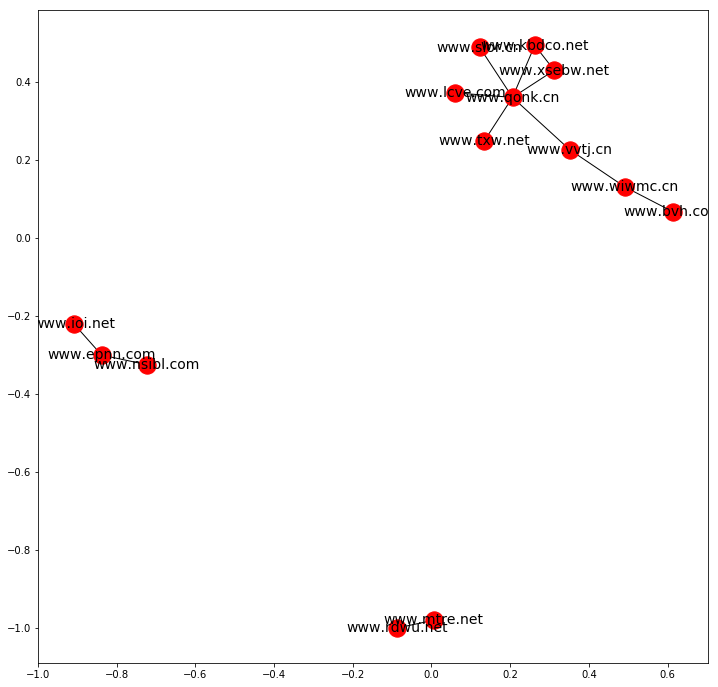

In [116]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx(website_network,font_size=14)

In [118]:
sorted(nx.pagerank(website_network).items(),key=lambda x:x[1],reverse=True)

[('www.qonk.cn', 0.1887656084678495),
 ('www.epnn.com', 0.12310030329107224),
 ('www.vvtj.cn', 0.09589194704450667),
 ('www.wiwmc.cn', 0.0735658566318514),
 ('www.mtre.net', 0.07142857142857142),
 ('www.rdwu.net', 0.07142857142857142),
 ('www.kbdco.net', 0.06514160774815717),
 ('www.xsebw.net', 0.06514160774815717),
 ('www.ioi.net', 0.045592705497321015),
 ('www.nsibl.com', 0.045592705497321015),
 ('www.bvh.com', 0.04198058563054036),
 ('www.slor.cn', 0.03745664319536016),
 ('www.txw.net', 0.03745664319536016),
 ('www.lcve.com', 0.03745664319536016)]